In [1]:
# Import libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\steve\anaconda3\envs\pyvizenvnew\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read CSV, parse dates, and set index
csvpath = Path('../Resources/weather.csv', parse_dates=True, index_col='Date')
df = pd.read_csv(csvpath)

In [3]:
# Temperature readings of the first 24 hours
df.Temperature[:24]

0     46.2
1     44.6
2     44.1
3     43.8
4     43.5
5     43.0
6     43.1
7     42.3
8     42.5
9     45.9
10    49.4
11    52.4
12    54.9
13    57.1
14    58.4
15    59.1
16    59.1
17    58.0
18    54.5
19    51.3
20    49.2
21    48.1
22    47.2
23    46.4
Name: Temperature, dtype: float64

In [5]:
# Shift and calculate diff
df['Lag_Temperature'] = df.Temperature.shift()
df['Temperature_Difference'] = df.Temperature.diff()
df.head()

,Temperature,DewPoint,Pressure,Date,Lag_Temperature,Temperature_Difference
0,46.2,37.5,1.0,20100101 00:00,NaN,NaN
1,44.6,37.1,1.0,20100101 01:00,46.2,-1.6
2,44.1,36.9,1.0,20100101 02:00,44.6,-0.5
3,43.8,36.9,1.0,20100101 03:00,44.1,-0.3
4,43.5,36.8,1.0,20100101 04:00,43.8,-0.3


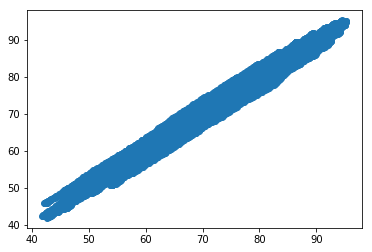

In [6]:
# Scatter plot of lagged temperature vs temperature
x = df['Lag_Temperature']
y = df['Temperature']
plt.scatter(x, y)

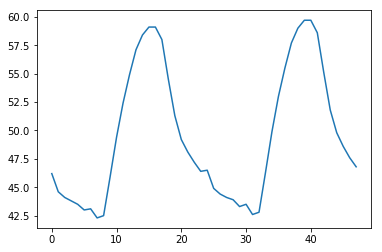

In [7]:
# Plot of the first 48 hours of temp
df.Temperature[:48].plot()

In [8]:
# Autocorrelation
df.Temperature.autocorr(lag=1)

0.990901872659764

In [9]:
# Autocorrelation at lag of 24
df.Temperature.autocorr(lag=24)

0.9997947452312897

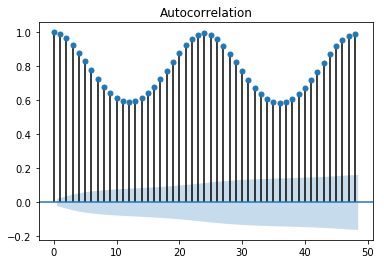

In [11]:
# plot_acf() measures autocorrelation at different lags
# Highest autocorrelation at lag of 24 hours
plot_acf(df.Temperature, lags=48);

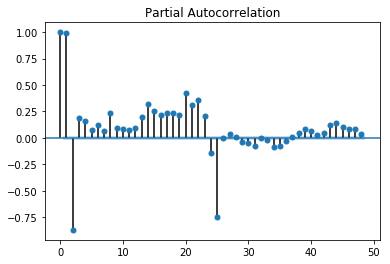

In [26]:
# Plot autocorrelation at lag of 48
sm.graphics.tsaplots.plot_pacf(df.Temperature, lags=48, zero=True);

In [24]:
df.Temperature.head(48)

0     46.2
1     44.6
2     44.1
3     43.8
4     43.5
5     43.0
6     43.1
7     42.3
8     42.5
9     45.9
10    49.4
11    52.4
12    54.9
13    57.1
14    58.4
15    59.1
16    59.1
17    58.0
18    54.5
19    51.3
20    49.2
21    48.1
22    47.2
23    46.4
24    46.5
25    44.9
26    44.4
27    44.1
28    43.9
29    43.3
30    43.5
31    42.6
32    42.8
33    46.3
34    49.9
35    53.0
36    55.5
37    57.7
38    59.0
39    59.7
40    59.7
41    58.6
42    55.1
43    51.8
44    49.8
45    48.6
46    47.6
47    46.8
Name: Temperature, dtype: float64